### Analisis Runtun Waktu pada Curah Hujan Kota Semarang ###

Import package yang dibutuhkan

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['text.color'] = 'k'

Import file yang berisi data curah hujan

In [2]:
data = pd.read_csv('curah hujan.csv')

Menyatukan data curah hujan menjadi satu kolom

In [3]:
data= pd.Series(data.values.ravel('F'))

In [4]:
data.head()

0    404
1    342
2    306
3    227
4     91
dtype: int64

In [5]:
data.dtypes

dtype('int64')

In [6]:
data.shape

(384,)

Membuat dataframe dari data

In [7]:
data1=pd.DataFrame(data=data,columns=['curah hujan'])
data1.head()

,curah hujan
0,404
1,342
2,306
3,227
4,91


Membuat isian data yaitu bulan-tahun

In [8]:
date1 = "1984-01"
date2 = "2015-12"

y0 = int( date1.split('-')[0] ) # 1984
y1 = int( date2.split('-')[0] ) # 2015

m0 = int( date1.split('-')[1] ) - 1 # 10-1 --> 9 because will be used for indexing
m1 = int( date2.split('-')[1] ) - 1 # 01-1 --> 0 because will be used for indexing

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
result = []
start = m0
for y in range(y0, y1+1):
    for m in range(start,12):
        result.append( str( months[m  % 12])+'-'+str(y) )
        if y == y1 and (m % 12) == m1:
            break
    start = 0

print (result)

['Jan-1984', 'Feb-1984', 'Mar-1984', 'Apr-1984', 'May-1984', 'Jun-1984', 'Jul-1984', 'Aug-1984', 'Sep-1984', 'Oct-1984', 'Nov-1984', 'Dec-1984', 'Jan-1985', 'Feb-1985', 'Mar-1985', 'Apr-1985', 'May-1985', 'Jun-1985', 'Jul-1985', 'Aug-1985', 'Sep-1985', 'Oct-1985', 'Nov-1985', 'Dec-1985', 'Jan-1986', 'Feb-1986', 'Mar-1986', 'Apr-1986', 'May-1986', 'Jun-1986', 'Jul-1986', 'Aug-1986', 'Sep-1986', 'Oct-1986', 'Nov-1986', 'Dec-1986', 'Jan-1987', 'Feb-1987', 'Mar-1987', 'Apr-1987', 'May-1987', 'Jun-1987', 'Jul-1987', 'Aug-1987', 'Sep-1987', 'Oct-1987', 'Nov-1987', 'Dec-1987', 'Jan-1988', 'Feb-1988', 'Mar-1988', 'Apr-1988', 'May-1988', 'Jun-1988', 'Jul-1988', 'Aug-1988', 'Sep-1988', 'Oct-1988', 'Nov-1988', 'Dec-1988', 'Jan-1989', 'Feb-1989', 'Mar-1989', 'Apr-1989', 'May-1989', 'Jun-1989', 'Jul-1989', 'Aug-1989', 'Sep-1989', 'Oct-1989', 'Nov-1989', 'Dec-1989', 'Jan-1990', 'Feb-1990', 'Mar-1990', 'Apr-1990', 'May-1990', 'Jun-1990', 'Jul-1990', 'Aug-1990', 'Sep-1990', 'Oct-1990', 'Nov-1990', 'De

In [9]:
data2=pd.DataFrame(data=result,columns=['tanggal'])
data2.head()

,tanggal
0,Jan-1984
1,Feb-1984
2,Mar-1984
3,Apr-1984
4,May-1984


Menyatukan data1 dan data2 menjadi satu dataframe

In [10]:
data3=pd.concat([data2, data1],axis=1)

In [11]:
data3.dtypes

tanggal        object
curah hujan     int64
dtype: object

In [12]:
data3['tanggal']=pd.to_datetime(data3['tanggal'])
data3.head()

,tanggal,curah hujan
0,1984-01-01,404
1,1984-02-01,342
2,1984-03-01,306
3,1984-04-01,227
4,1984-05-01,91


In [13]:
data3=data3.set_index('tanggal')
data3.head()

,curah hujan
tanggal,
1984-01-01,404
1984-02-01,342
1984-03-01,306
1984-04-01,227
1984-05-01,91


Split data menjadi data training dan data testing

In [14]:
trainingSet=data3.iloc[:300,]
testSet=data3.iloc[300:,]
trainingSet.tail()

,curah hujan
tanggal,
2008-08-01,81
2008-09-01,70
2008-10-01,114
2008-11-01,304
2008-12-01,353


In [15]:
testSet.head()

,curah hujan
tanggal,
2009-01-01,225
2009-02-01,552
2009-03-01,75
2009-04-01,243
2009-05-01,354


In [16]:
tsTraining = trainingSet['curah hujan']
tsTraining.tail(10)

tanggal
2008-03-01    227
2008-04-01     85
2008-05-01     55
2008-06-01     58
2008-07-01      2
2008-08-01     81
2008-09-01     70
2008-10-01    114
2008-11-01    304
2008-12-01    353
Name: curah hujan, dtype: int64

In [17]:
tsTesting = testSet['curah hujan']
tsTesting['2009':]

tanggal
2009-01-01    225
2009-02-01    552
2009-03-01     75
2009-04-01    243
2009-05-01    354
2009-06-01    110
2009-07-01     46
2009-08-01     27
2009-09-01     78
2009-10-01     25
2009-11-01    171
2009-12-01    285
2010-01-01    433
2010-02-01    332
2010-03-01    337
2010-04-01    210
2010-05-01    263
2010-06-01    107
2010-07-01     79
2010-08-01    190
2010-09-01    171
2010-10-01    272
2010-11-01    205
2010-12-01    413
2011-01-01    253
2011-02-01    248
2011-03-01    183
2011-04-01    121
2011-05-01     81
2011-06-01     59
             ... 
2013-07-01    115
2013-08-01     82
2013-09-01     20
2013-10-01     99
2013-11-01    146
2013-12-01    242
2014-01-01    736
2014-02-01    377
2014-03-01    157
2014-04-01     74
2014-05-01    182
2014-06-01    129
2014-07-01    182
2014-08-01     10
2014-09-01      0
2014-10-01     45
2014-11-01    194
2014-12-01    193
2015-01-01    238
2015-02-01    273
2015-03-01    212
2015-04-01    258
2015-05-01    185
2015-06-01     69
20

membuat plot dari data training

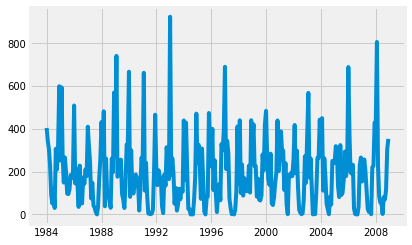

In [18]:
plt.plot(tsTraining)

Visualisasi data dengan metode dekomposisi, akan menguraikan data time series menjadi tiga komponen, yaitu tren, musim, dan noise.

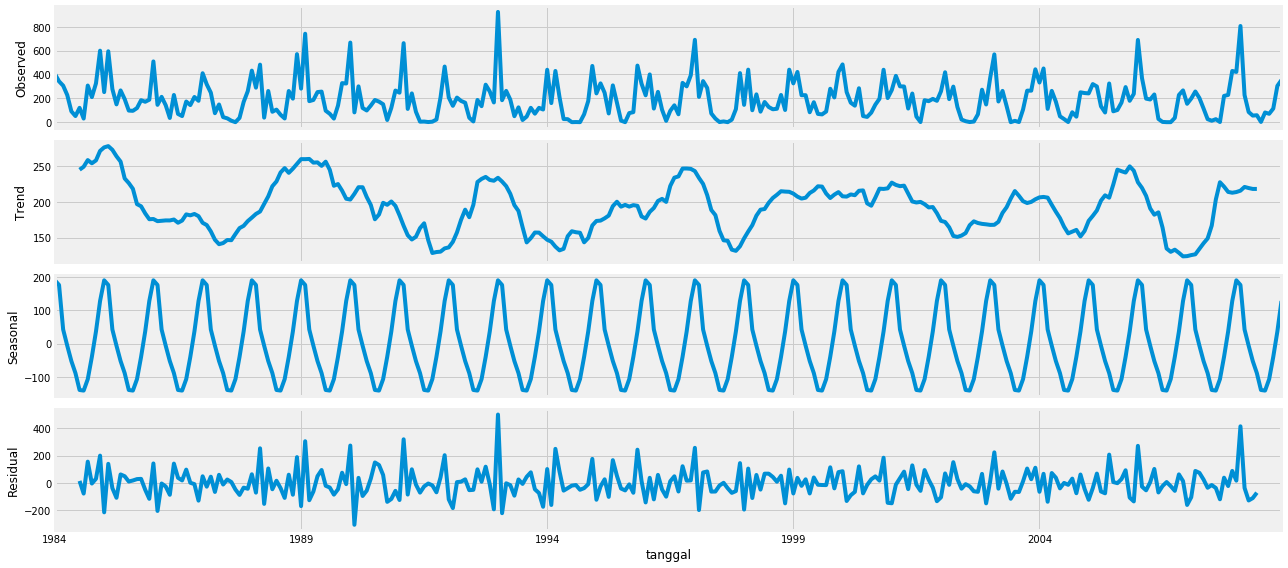

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(tsTraining, model='additive')
fig = decomposition.plot()
plt.show()

Membuat fungsi untuk menguji stasioneritas data

In [20]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

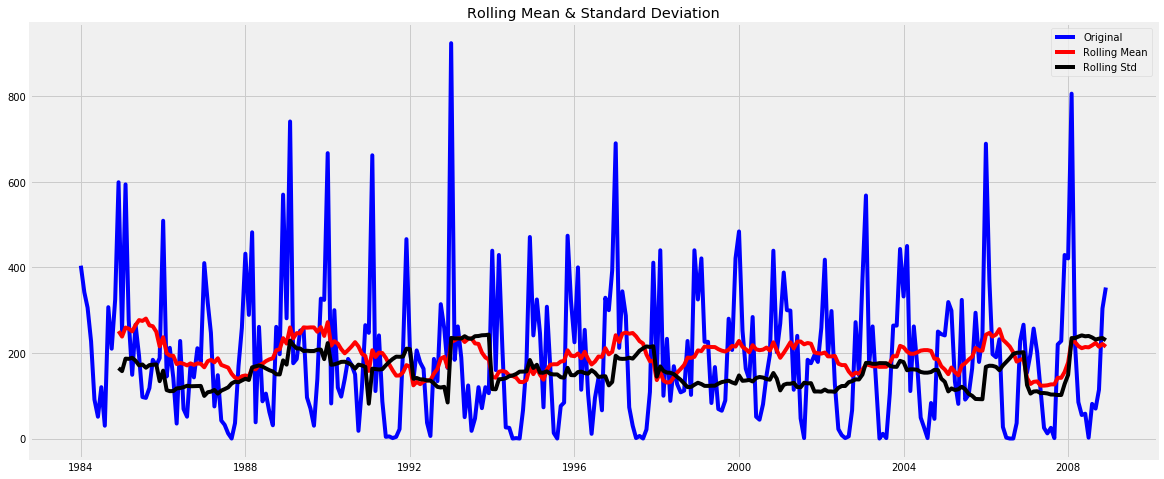

Results of Dickey-Fuller Test:
Test Statistic                  -5.530489
p-value                          0.000002
#Lags Used                      16.000000
Number of Observations Used    283.000000
Critical Value (1%)             -3.453670
Critical Value (5%)             -2.871808
Critical Value (10%)            -2.572241
dtype: float64


In [21]:
test_stationarity(tsTraining)

Import package yang dibutuhkan

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

Membuat plot ACF dan PACF

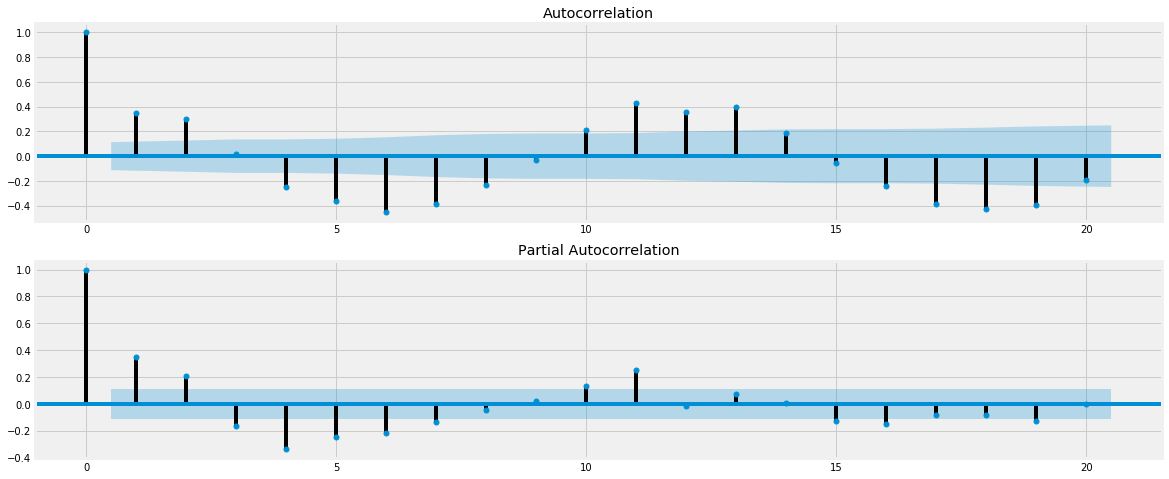

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(tsTraining, ax=pyplot.gca(),lags=20)
pyplot.subplot(212)
plot_pacf(tsTraining, ax=pyplot.gca(),lags=20)
pyplot.show()

membuat sebuah program untuk menentukan model SARIMA yang terbaik

In [ ]:
p = range(0, 1)
d = range(0, 1)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(tsTraining,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 6)12 - AIC:4149.363695948659
ARIMA(0, 0, 0)x(0, 0, 1, 6)12 - AIC:4047.219061892151
ARIMA(0, 0, 0)x(0, 0, 2, 6)12 - AIC:3863.5737405155774
ARIMA(0, 0, 0)x(0, 1, 0, 6)12 - AIC:4114.137580506836
ARIMA(0, 0, 0)x(0, 1, 1, 6)12 - AIC:3738.781678835664
ARIMA(0, 0, 0)x(0, 1, 2, 6)12 - AIC:3610.5814582190205
ARIMA(0, 0, 0)x(0, 2, 0, 6)12 - AIC:4392.8529791835945
ARIMA(0, 0, 0)x(0, 2, 1, 6)12 - AIC:3965.887010684503
ARIMA(0, 0, 0)x(0, 2, 2, 6)12 - AIC:3619.71118152398
ARIMA(0, 0, 0)x(1, 0, 0, 6)12 - AIC:4026.9995577752034
ARIMA(0, 0, 0)x(1, 0, 1, 6)12 - AIC:3824.7794685287295
ARIMA(0, 0, 0)x(1, 0, 2, 6)12 - AIC:3696.156227241793
ARIMA(0, 0, 0)x(1, 1, 0, 6)12 - AIC:3761.918072424564
ARIMA(0, 0, 0)x(1, 1, 1, 6)12 - AIC:3670.2464007261815
ARIMA(0, 0, 0)x(1, 1, 2, 6)12 - AIC:3496.2392590731106
ARIMA(0, 0, 0)x(1, 2, 0, 6)12 - AIC:3894.8199172943514
ARIMA(0, 0, 0)x(1, 2, 1, 6)12 - AIC:3701.007310232895
ARIMA(0, 0, 0)x(1, 2, 2, 6)12 - AIC:3605.17012380112
ARIMA(0, 0, 0)x(2, 0, 

Melakukan fitting data training dengan model terbaik yang telah didapatkan

In [91]:
mod = sm.tsa.statespace.SARIMAX(tsTraining,
                                order=(1, 1, 3),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.aic

C:\Users\akuaa\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0499      0.434      0.115      0.908      -0.800       0.900
ma.L1         -1.1936      0.417     -2.862      0.004      -2.011      -0.376
ma.L2          0.3610      0.469      0.771      0.441      -0.557       1.279
ma.L3         -0.1674      0.068     -2.480      0.013      -0.300      -0.035
ma.S.L12      -1.1960      0.060    -19.988      0.000      -1.313      -1.079
ma.S.L24       0.2829      0.052      5.471      0.000       0.182       0.384
sigma2      1.236e+04   4.15e-05   2.97e+08      0.000    1.24e+04    1.24e+04


3210.367251731653

menjalankan diagnostik pada model untuk menyelidiki perilaku dalam model yang tidak biasa

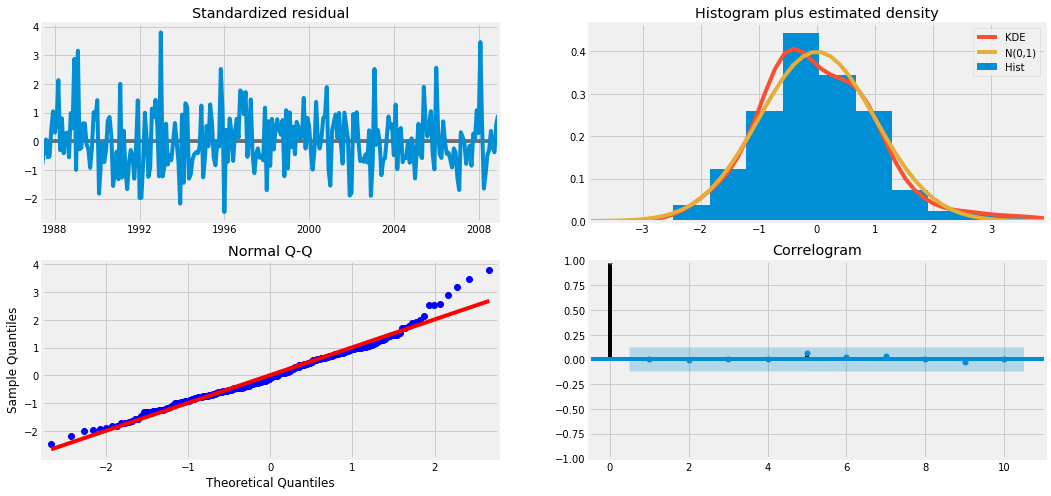

In [83]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Melakukan prediksi pada data testing, kemudian dibandingkan dengan data sebenarnya pada data testing

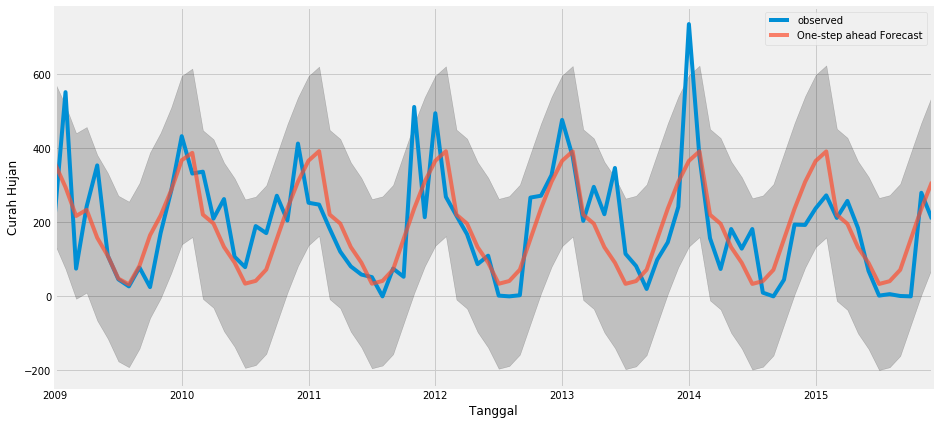

In [85]:
pred = results.get_prediction(pd.to_datetime('2009-01-01'), pd.to_datetime('2015-12-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = tsTesting['2009':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Tanggal')
ax.set_ylabel('Curah Hujan')
plt.legend()
plt.show()

mencari MSE pada model

In [86]:
ts_forecasted = pred.predicted_mean
ts_truth = tsTesting['2009-01-01':]
mse = ((ts_forecasted - ts_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 10462.85


Menampilkan RMSE pada model

In [87]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 102.29


Melakukan forecast sebanyak 200 bulan ke depan, dari bulan Januari 2009

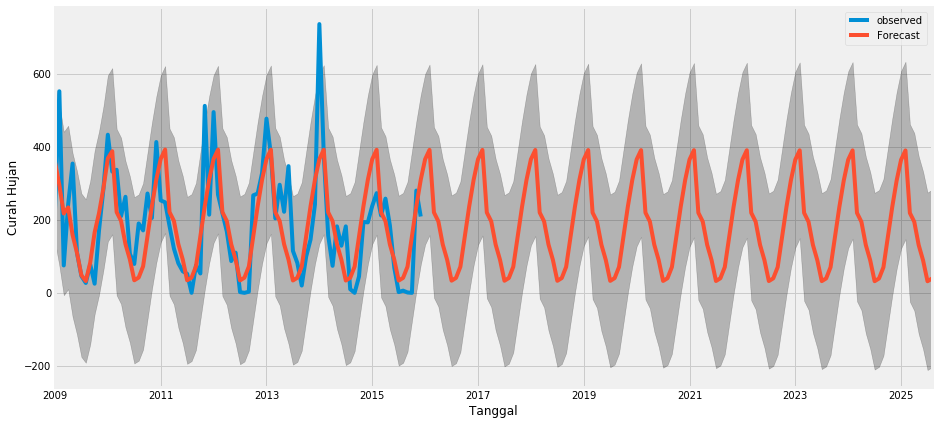

In [88]:
pred_uc = results.get_forecast(steps=200)
pred_ci = pred_uc.conf_int()
ax = tsTesting.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Tanggal')
ax.set_ylabel('Curah Hujan')
plt.legend()
plt.show()